<a href="https://colab.research.google.com/github/jacob-umich/stats-dash/blob/eda/SDOH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
df = pd.read_csv('CDI_Data.csv')

us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
    'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
    'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

df = df[df['LocationDesc'].isin(us_states)]
print(df.columns)

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')


In [98]:
data_sources = df['Topic']
print(data_sources.unique())

['Disability' 'Diabetes' 'Health Status' 'Arthritis' 'Asthma' 'Sleep'
 'Mental Health' 'Cardiovascular Disease' 'Cancer' 'Tobacco' 'Oral Health'
 'Nutrition, Physical Activity, and Weight Status'
 'Chronic Obstructive Pulmonary Disease' 'Alcohol'
 'Social Determinants of Health' 'Cognitive Health and Caregiving'
 'Immunization' 'Maternal Health' 'Chronic Kidney Disease']


In [120]:
social_determinants_df = df[df['Topic'] == 'Social Determinants of Health']
print(social_determinants_df['Question'].unique())
print("Number of unique questions under 'Social Determinants of Health':", social_determinants_df['Question'].nunique())

['Lack of health insurance among adults aged 18-64 years'
 'Unemployment rate among people 16 years and older in the labor force'
 'Routine checkup within the past year among adults'
 'Health insurance coverage after pregnancy among women with a recent live birth'
 'High school completion among adults aged 18-24'
 'Health insurance coverage in the month before pregnancy among women with a recent live birth'
 'Living below 150% of the poverty threshold among all people'
 'No broadband internet subscription among households'
 'Food insecure in the past 12 months among households'
 'Lack of reliable transportation in the past 12 months among adults'
 'Lack of social and emotional support needed among adults'
 'Unable to pay mortgage, rent, or utility bills in the past 12 months among adults']
Number of unique questions under 'Social Determinants of Health': 12


In [141]:
conditions = (df['Topic'] == 'Social Determinants of Health') & \
              (df['YearStart'] == 2019) & \
              (df['Question'] == 'Lack of health insurance among adults aged 18-64 years') & \
              (df['DataValueType'] == 'Crude Prevalence') & \
              (df['StratificationCategory1'] == 'Overall')

filtered_df = df.loc[conditions, ['YearStart', 'LocationDesc', 'Question', 'DataValue', 'StratificationCategory1']]
health_ins_df = filtered_df.sort_values(by='DataValue').nlargest(5, 'DataValue')

Note: This data is taken from 2022 (all other datasets taken from 2019, consider removing)

In [131]:
conditions = (df['Topic'] == 'Social Determinants of Health') & \
              (df['YearStart'] == 2022) & \
              (df['Question'] == 'Unable to pay mortgage, rent, or utility bills in the past 12 months among adults') & \
              (df['DataValueType'] == 'Crude Prevalence') & \
              (df['StratificationCategory1'] == 'Overall')

filtered_df = df.loc[conditions, ['YearStart', 'LocationDesc', 'Question', 'DataValue', 'StratificationCategory1']]
rent_df = filtered_df.sort_values(by='DataValue').nlargest(5, 'DataValue')

Note: This data is taken from 2022 (all other datasets taken from 2019, consider removing)

In [146]:
conditions = (df['Topic'] == 'Social Determinants of Health') & \
              (df['YearStart'] == 2022) & \
              (df['Question'] == 'Lack of social and emotional support needed among adults') & \
              (df['DataValueType'] == 'Crude Prevalence') & \
              (df['StratificationCategory1'] == 'Overall')

filtered_df = df.loc[conditions, ['YearStart', 'LocationDesc', 'Question', 'DataValue', 'StratificationCategory1']]
support_df = filtered_df.sort_values(by='DataValue').nlargest(5, 'DataValue')

Note: This data is taken from 2022 (all other datasets taken from 2019, consider removing)

In [128]:
conditions = (df['Topic'] == 'Social Determinants of Health') & \
              (df['YearStart'] == 2022) & \
              (df['Question'] == 'Lack of reliable transportation in the past 12 months among adults') & \
              (df['DataValueType'] == 'Crude Prevalence') & \
              (df['StratificationCategory1'] == 'Overall')

filtered_df = df.loc[conditions, ['YearStart', 'LocationDesc', 'Question', 'DataValue', 'StratificationCategory1']]
transportation_df = filtered_df.sort_values(by='DataValue').nlargest(5, 'DataValue')

In [140]:
conditions = (df['Topic'] == 'Social Determinants of Health') & \
              (df['YearStart'] == 2019) & \
              (df['Question'] == 'Food insecure in the past 12 months among households') & \
              (df['DataValueType'] == 'Crude Prevalence') & \
              (df['StratificationCategory1'] == 'Overall')

filtered_df = df.loc[conditions, ['YearStart', 'LocationDesc', 'Question', 'DataValue', 'StratificationCategory1']]
insecure_df = filtered_df.sort_values(by='DataValue').nlargest(5, 'DataValue')

In [139]:
conditions = (df['Topic'] == 'Social Determinants of Health') & \
              (df['YearStart'] == 2019) & \
              (df['Question'] == 'No broadband internet subscription among households') & \
              (df['DataValueType'] == 'Crude Prevalence') & \
              (df['StratificationCategory1'] == 'Overall')

filtered_df = df.loc[conditions, ['YearStart', 'LocationDesc', 'Question', 'DataValue', 'StratificationCategory1']]
internet_df = filtered_df.sort_values(by='DataValue').nlargest(5, 'DataValue')

In [138]:
conditions = (df['Topic'] == 'Social Determinants of Health') & \
              (df['YearStart'] == 2019) & \
              (df['Question'] == 'Health insurance coverage in the month before pregnancy among women with a recent live birth') & \
              (df['DataValueType'] == 'Crude Prevalence') & \
              (df['StratificationCategory1'] == 'Overall')

filtered_df = df.loc[conditions, ['YearStart', 'LocationDesc', 'Question', 'DataValue', 'StratificationCategory1']]
live_birth_df = filtered_df.sort_values(by='DataValue').nsmallest(5, 'DataValue')

In [137]:
conditions = (df['Topic'] == 'Social Determinants of Health') & \
              (df['YearStart'] == 2019) & \
              (df['Question'] == 'Health insurance coverage after pregnancy among women with a recent live birth') & \
              (df['DataValueType'] == 'Crude Prevalence') & \
              (df['StratificationCategory1'] == 'Overall')

filtered_df = df.loc[conditions, ['YearStart', 'LocationDesc', 'Question', 'DataValue', 'StratificationCategory1']]
health_ins_birth_df = filtered_df.sort_values(by='DataValue').nsmallest(5, 'DataValue')

In [136]:
conditions = (df['Topic'] == 'Social Determinants of Health') & \
              (df['YearStart'] == 2019) & \
              (df['Question'] == 'Living below 150% of the poverty threshold among all people') & \
              (df['DataValueType'] == 'Crude Prevalence') & \
              (df['StratificationCategory1'] == 'Overall')

filtered_df = df.loc[conditions, ['YearStart', 'LocationDesc', 'Question', 'DataValue', 'StratificationCategory1']]
below_poverty_df = filtered_df.sort_values(by='DataValue').nlargest(5, 'DataValue')

In [135]:
conditions = (df['Topic'] == 'Social Determinants of Health') & \
              (df['YearStart'] == 2019) & \
              (df['Question'] == 'Routine checkup within the past year among adults') & \
              (df['DataValueType'] == 'Crude Prevalence') & \
              (df['StratificationCategory1'] == 'Overall')

filtered_df = df.loc[conditions, ['YearStart', 'LocationDesc', 'Question', 'DataValue', 'StratificationCategory1']]
checkup_df = filtered_df.sort_values(by='DataValue').nsmallest(5, 'DataValue')

In [134]:
conditions = (df['Topic'] == 'Social Determinants of Health') & \
              (df['YearStart'] == 2019) & \
              (df['Question'] == 'High school completion among adults aged 18-24') & \
              (df['StratificationCategory1'] == 'Overall')

filtered_df = df.loc[conditions, ['YearStart', 'LocationDesc', 'Topic', 'Question', 'DataValue']]
finish_hs_df = filtered_df.sort_values(by='DataValue').nsmallest(5, 'DataValue')

In [133]:
conditions = (df['Topic'] == 'Social Determinants of Health') & \
              (df['YearStart'] == 2019) & \
              (df['Question'] == 'Unemployment rate among people 16 years and older in the labor force') & \
              (df['StratificationCategory1'] == 'Overall')

filtered_df = df.loc[conditions, ['YearStart', 'LocationDesc', 'Topic', 'Question', 'DataValue']]
unemployment_df = filtered_df.sort_values(by='DataValue').nlargest(5, 'DataValue')

In [167]:
combined_df = pd.concat([unemployment_df, finish_hs_df, below_poverty_df, checkup_df, health_ins_birth_df, live_birth_df, internet_df, insecure_df, transportation_df, support_df, rent_df, health_ins_df])
combined_counts = combined_df['LocationDesc'].value_counts()
filtered_counts = combined_counts[combined_counts > 2]
print(filtered_counts.count())

9


In [161]:
life_expectancy_df = pd.read_csv('life_expectancy.csv')
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

life_expectancy_df['STATE'] = life_expectancy_df['STATE'].map(state_mapping)
life_expectancy_df = life_expectancy_df[life_expectancy_df['YEAR'] == 2019]
life_expectancy_df.drop(columns=['URL'], inplace=True)

print(life_expectancy_df.count())

YEAR     50
STATE    50
RATE     50
dtype: int64


In [175]:
sorted_df = life_expectancy_df.sort_values(by='RATE')
lowest_values = sorted_df.head(10)
print(lowest_values)

    YEAR           STATE  RATE
73  2019     Mississippi  74.4
97  2019   West Virginia  74.5
50  2019         Alabama  75.2
66  2019        Kentucky  75.5
91  2019       Tennessee  75.6
53  2019        Arkansas  75.7
85  2019        Oklahoma  75.7
67  2019       Louisiana  75.7
89  2019  South Carolina  76.8
84  2019            Ohio  76.9


In [166]:
merged_df = pd.merge(lowest_values, filtered_counts, left_on='STATE', right_index=True)

print(merged_df)

    YEAR          STATE  RATE  count
73  2019    Mississippi  74.4     11
97  2019  West Virginia  74.5      5
53  2019       Arkansas  75.7      3
67  2019      Louisiana  75.7      4


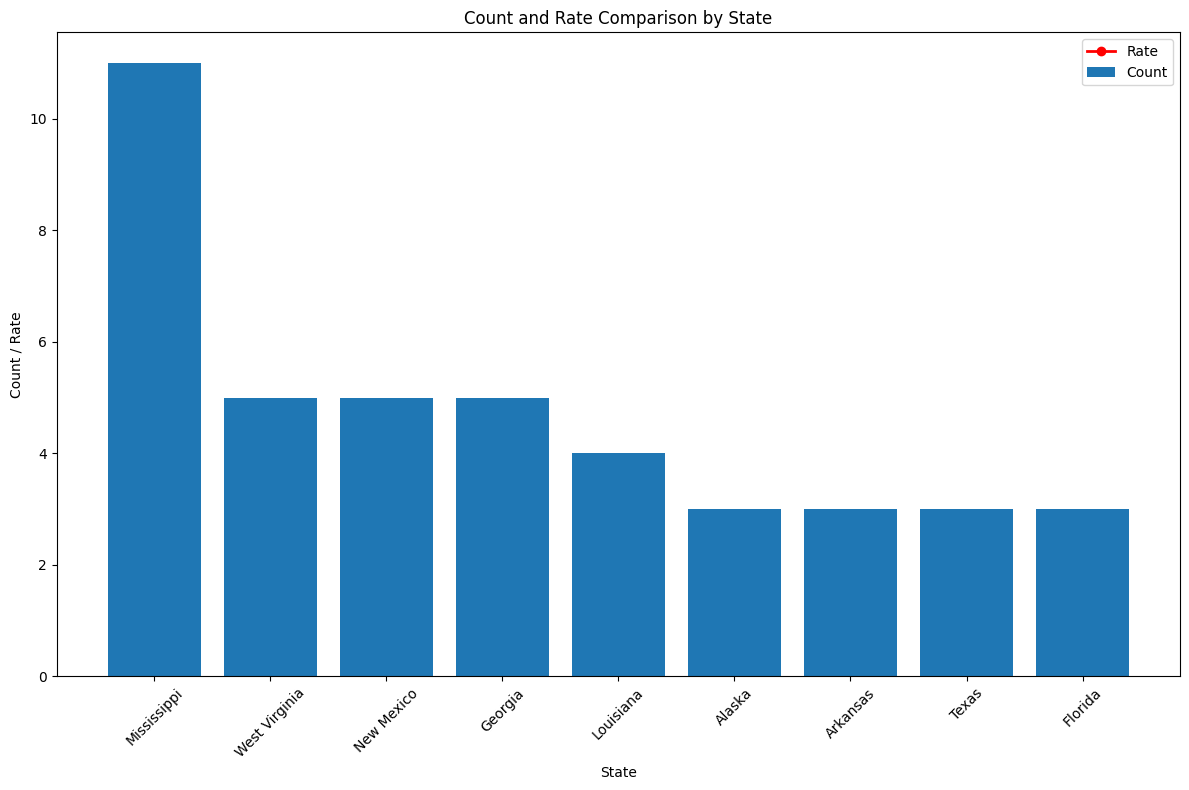

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have filtered_counts and life_expectancy_df DataFrames
# Replace these DataFrames with your actual DataFrames

# Step 1: Create a bar plot for filtered counts
plt.figure(figsize=(12, 8))
plt.bar(filtered_counts.index, filtered_counts.values, label='Count')

merged_df = pd.merge(life_expectancy_df, filtered_counts, left_on='STATE', right_index=True)
plt.plot(merged_df['STATE'], merged_df['RATE'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
plt.xlabel('State')
plt.ylabel('Count / Rate')
plt.title('Count and Rate Comparison by State')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
